In [1]:
import pandas as pd
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

importlib.import_module("data_load")
importlib.import_module("quat")

from data_load import make_quadruples

In [2]:
def get_data(file_path):
    
    file = open(file_path, "r")

    allText = file.read()

    words = list(map(str, allText.split()))

    matrice_height = int(len(words) / 30)
    matrice = np.ones((matrice_height, 24))

    emplacement = 20
    iter1 = 0
    for i in range(emplacement, int(len(words) / 30) + emplacement):
        iter2 = 0
        for j in range(emplacement + 6, emplacement + 30):
            matrice[(iter1, iter2)] = words[j]
            iter2 += 1
        iter1 += 1
        emplacement += 30
    X_2 = np.delete(matrice, 1, 1)
    X_final = np.delete(X_2, 10, 1)
    
    file.close()
    
    return X_final, matrice_height

In [3]:
def read_ctf(file_path):
    
    file2 = open(file_path, "r")
    
    allText2 = file2.read()
    words2 = list(map(str, allText2.split()))
    
    nb_debut_donnees = 88
    nb_mots = len(words2) - nb_debut_donnees
    print("nb_mots = " + str(nb_mots))
    nb_mots_par_ligne = 11
    
    nb_ligne_matrice = int(nb_mots / nb_mots_par_ligne)
    print("nb_ligne_matrice = " + str(nb_ligne_matrice))
    nb_colonne_matrice = 3
    matrice = np.empty((nb_ligne_matrice, nb_colonne_matrice))
    emplacement = 0
    
    print("Extraction des données à partir du fichier ....")
    for i in range(nb_debut_donnees, nb_mots + nb_debut_donnees, nb_mots_par_ligne):
        matrice[(emplacement, 0)] = words2[i + 5]
        matrice[(emplacement, 1)] = words2[i + 6]
        matrice[(emplacement, 2)] = words2[i + 7]
        emplacement += 1
    print("ok !")    
    file2.close()
    
    return matrice, nb_ligne_matrice

In [4]:
file_in_path = r"C_maps.txt"

X, height_in = get_data(file_in_path)

In [5]:
X.shape

(250000, 22)

In [6]:
# X_t = X.T
# X_t.shape

In [7]:
file_out_path = r"exercise.ctf"

y, height_out = read_ctf(file_out_path)

nb_mots = 2750000
nb_ligne_matrice = 250000
Extraction des données à partir du fichier ....
ok !


In [8]:
def normalise(matrice):
    """
    normalise les matrice de 3
    """
    for x in matrice:
        x[0] = (x[0] - 180) / 104
        x[1] = (x[1] - 57.17) / 22
        x[2] = (x[2] - 180) / 104
        # print(x)
    return matrice

In [9]:
y_n = normalise(y)
y_n

array([[-0.21038462, -0.89231818,  0.68006731],
       [ 1.32135577, -0.31286364, -0.141875  ],
       [-0.993625  ,  0.90536364, -0.29908654],
       ...,
       [-1.54265385, -0.80277273,  0.53752885],
       [-1.39299038, -0.96763636, -1.07438462],
       [ 0.85533654,  1.27972727, -1.03386538]])

In [10]:
# y_n_t = y_n.T
# y_n_t.shape
y_n.shape

(250000, 3)

In [11]:
X_final = X
y_final = y_n

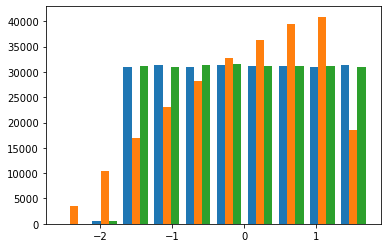

In [12]:
# n = 100000
# sym = 3
# data, miso = make_quadruples(n, sym)
plt.hist(y_final)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=1)
# X_train = reshape_set(X_train)
# X_test = reshape_set(X_test)

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(22,)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(14))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(7))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(3))
# model.add(tf.keras.layers.Activation("sigmoid"))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(22,),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Activation("sigmoid")])

In [57]:
opti = tf.keras.optimizers.Adam(learning_rate=0.05)  # sgd(0.01, momentum=0.9)

In [58]:
model.compile(
    optimizer=opti,
    loss="mse", # mse
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [ ]:
# model = keras.models.load_model('disangle_sym_5.h5')

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# model.save("disangle_sym_" + str(sym) + ".h5")



Epoch 1/20
6250/6250 [==============================] - 6s 924us/step - loss: 0.9891 - mean_absolute_error: 0.8530 - val_loss: 0.9889 - val_mean_absolute_error: 0.8506
Epoch 2/20
6250/6250 [==============================] - 6s 921us/step - loss: 0.9889 - mean_absolute_error: 0.8530 - val_loss: 0.9868 - val_mean_absolute_error: 0.8529
Epoch 3/20
6250/6250 [==============================] - 6s 923us/step - loss: 0.9890 - mean_absolute_error: 0.8530 - val_loss: 0.9932 - val_mean_absolute_error: 0.8523
Epoch 4/20
6250/6250 [==============================] - 6s 922us/step - loss: 0.9891 - mean_absolute_error: 0.8529 - val_loss: 0.9869 - val_mean_absolute_error: 0.8521
Epoch 5/20
6250/6250 [==============================] - 6s 926us/step - loss: 0.9889 - mean_absolute_error: 0.8529 - val_loss: 0.9868 - val_mean_absolute_error: 0.8533
Epoch 6/20
6250/6250 [==============================] - 6s 920us/step - loss: 0.9888 - mean_absolute_error: 0.8529 - val_loss: 0.9871 - val_mean_absolute_error:

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# model = tf.keras.models.load_model("disangle_sym_5.h5")


# data, miso = make_quadruples(2000, sym)
y_predict = model.predict(y_final)

# miso = 2*np.arccos(miso)*180/np.pi
# y_predict = 2*np.arccos(y_predict)*180/np.pi
plt.scatter(X, y_predict)
plt.show()
